In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('KNYC.csv')

In [30]:
data = df.copy()

Task 1: Import and Explore the Data 
1. Import necessary libraries: 
● Load your dataset (tips, or your chosen one). 
● Display first 10 rows and basic info using df.head(), df.info(), df.describe() 
● Check for missing values and data types. 

In [31]:
df.info()
df.describe()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  365 non-null    int64  
 1   date                   365 non-null    object 
 2   actual_mean_temp       365 non-null    int64  
 3   actual_min_temp        365 non-null    int64  
 4   actual_max_temp        365 non-null    int64  
 5   average_min_temp       365 non-null    int64  
 6   average_max_temp       365 non-null    int64  
 7   record_min_temp        365 non-null    int64  
 8   record_max_temp        365 non-null    int64  
 9   record_min_temp_year   365 non-null    int64  
 10  record_max_temp_year   365 non-null    int64  
 11  actual_precipitation   365 non-null    float64
 12  average_precipitation  365 non-null    float64
 13  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(10), object(1)
memory usage: 40.1+ KB

,index,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07
5,5,2014-7-6,75,66,84,68,84,54,103,1979,2010,0.00,0.13,1.97
6,6,2014-7-7,81,72,90,68,84,56,100,1914,2010,0.04,0.13,3.13
7,7,2014-7-8,81,71,91,69,84,56,100,1894,1993,0.39,0.14,1.80
8,8,2014-7-9,80,71,88,69,84,54,106,1963,1936,0.09,0.14,1.09
9,9,2014-7-10,78,72,83,69,84,55,102,1890,1993,0.00,0.15,1.79


In [15]:
df.describe()

,index,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,182.000000,54.736986,47.246575,61.734247,48.016438,62.079452,28.243836,83.731507,1924.079452,1958.923288,0.126164,0.136822,2.386137
std,105.510663,18.679979,18.277156,19.446971,14.749176,16.068765,20.729107,13.351306,38.000820,34.824357,0.325577,0.015734,1.045702
min,0.000000,11.000000,2.000000,19.000000,27.000000,38.000000,-15.000000,54.000000,1871.000000,1876.000000,0.000000,0.100000,0.860000
25%,91.000000,39.000000,34.000000,44.000000,34.000000,47.000000,8.000000,71.000000,1888.000000,1933.000000,0.000000,0.130000,1.690000
50%,182.000000,58.000000,50.000000,65.000000,48.000000,63.000000,31.000000,87.000000,1920.000000,1962.000000,0.000000,0.140000,2.160000
75%,273.000000,72.000000,64.000000,80.000000,63.000000,78.000000,47.000000,96.000000,1954.000000,1990.000000,0.050000,0.150000,2.750000
max,364.000000,85.000000,77.000000,92.000000,69.000000,84.000000,59.000000,106.000000,2015.000000,2013.000000,2.540000,0.170000,8.280000


In [32]:
def giveTempCats(a):
    if a['actual_mean_temp'] > 80:
        return 'HOT'
    elif a['actual_mean_temp'] < 50:
        return 'COLD'
    elif 50 <= a['actual_mean_temp'] <= 80:
        return 'AMBIENT'
    else:
        return 'MILD'


In [33]:
df['feelsLike'] = df.apply(giveTempCats, axis=1)


In [34]:
df.head()

,index,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,feelsLike
0,0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17,HOT
1,1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79,HOT
2,2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80,AMBIENT
3,3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76,AMBIENT
4,4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07,AMBIENT


In [8]:
df.isnull().sum()

index                    0
date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [10]:
df.dtypes

index                      int64
date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
dtype: object

Task 2: Univariate Analysis (Single Variable) 
Create the following Seaborn plots: 
1. Histogram (sns.histplot) – show distribution of a numerical column (e.g., total_bill, age). 
2. Count Plot (sns.countplot) – show frequency of categories (e.g., gender, day). 
3. Box Plot (sns.boxplot) – detect outliers and visualize spread

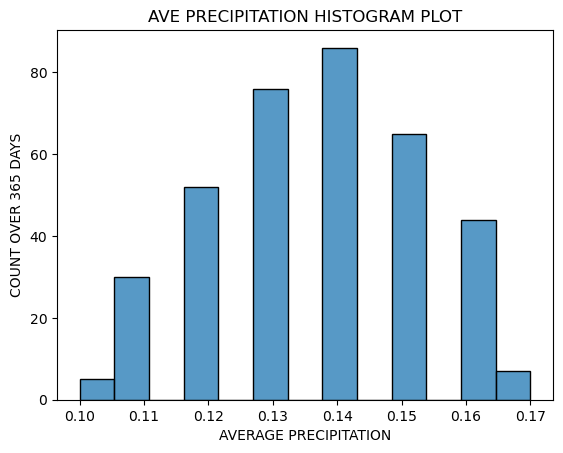

In [42]:
sns.histplot(data=df, x=df['average_precipitation'])
plt.xlabel("AVERAGE PRECIPITATION")
plt.ylabel("COUNT OVER 365 DAYS")
plt.title("AVE PRECIPITATION HISTOGRAM PLOT")
plt.show()

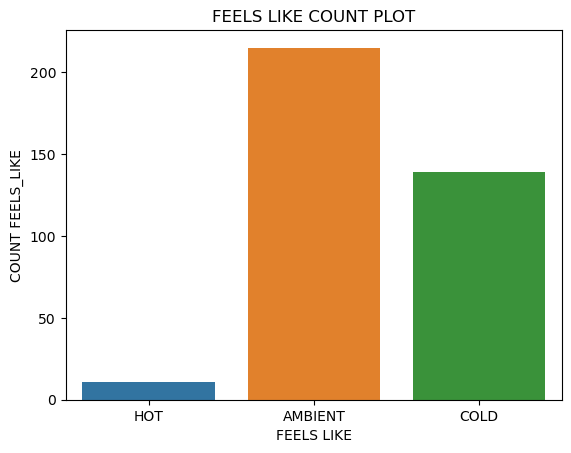

In [37]:
sns.countplot(data=df, x=df['feelsLike'])
plt.xlabel("FEELS LIKE")
plt.ylabel("COUNT FEELS_LIKE")
plt.title("FEELS LIKE COUNT PLOT")
plt.show()

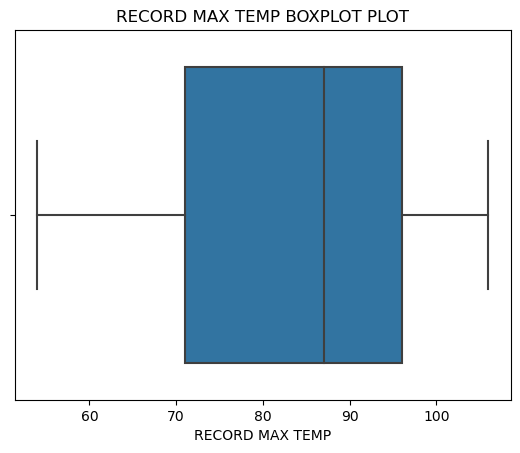

In [43]:
sns.boxplot(data=df, x=df['record_max_temp'])
plt.xlabel("RECORD MAX TEMP")
plt.title("RECORD MAX TEMP BOXPLOT PLOT")
plt.show()

Task 3: Bivariate & Multivariate Analysis 
Use Seaborn to visualize relationships between two or more variables: 
1. Scatter Plot (sns.scatterplot) – relationship between two numeric variables. 
2. Bar Plot (sns.barplot) – category vs numeric comparison. 
3. Heatmap (sns.heatmap) – correlation matrix for numeric features. 
4. Pair Plot (sns.pairplot) – visualize pairwise relationships. 

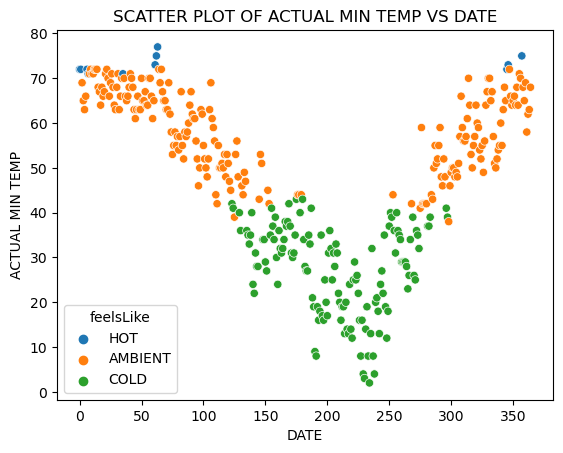

In [72]:
sns.scatterplot(data=df, x=df['index'], y=df['actual_min_temp'], hue=df['feelsLike'])
plt.xlabel("DATE")
plt.ylabel("ACTUAL MIN TEMP")
plt.title("SCATTER PLOT OF ACTUAL MIN TEMP VS DATE")
plt.show()

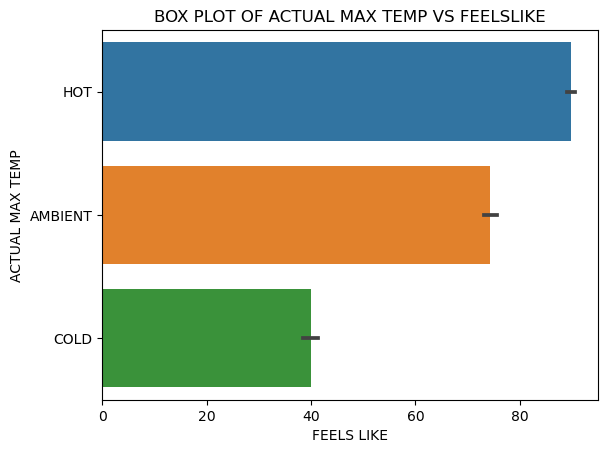

In [55]:
sns.barplot(data=df, x=df['actual_max_temp'], y=df['feelsLike'])
plt.xlabel("FEELS LIKE")
plt.ylabel("ACTUAL MAX TEMP")
plt.title("BOX PLOT OF ACTUAL MAX TEMP VS FEELSLIKE")
plt.show()

<Axes: >

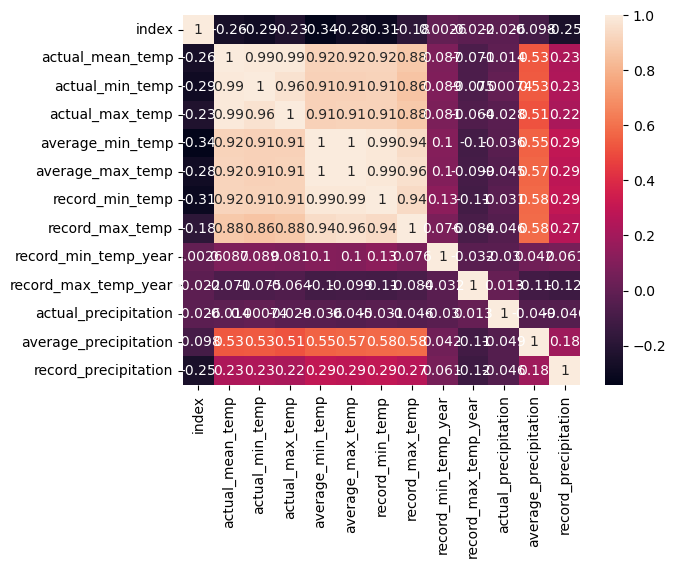

In [70]:
dcorr = df.corr(numeric_only=True)
sns.heatmap(data=dcorr, annot=True)

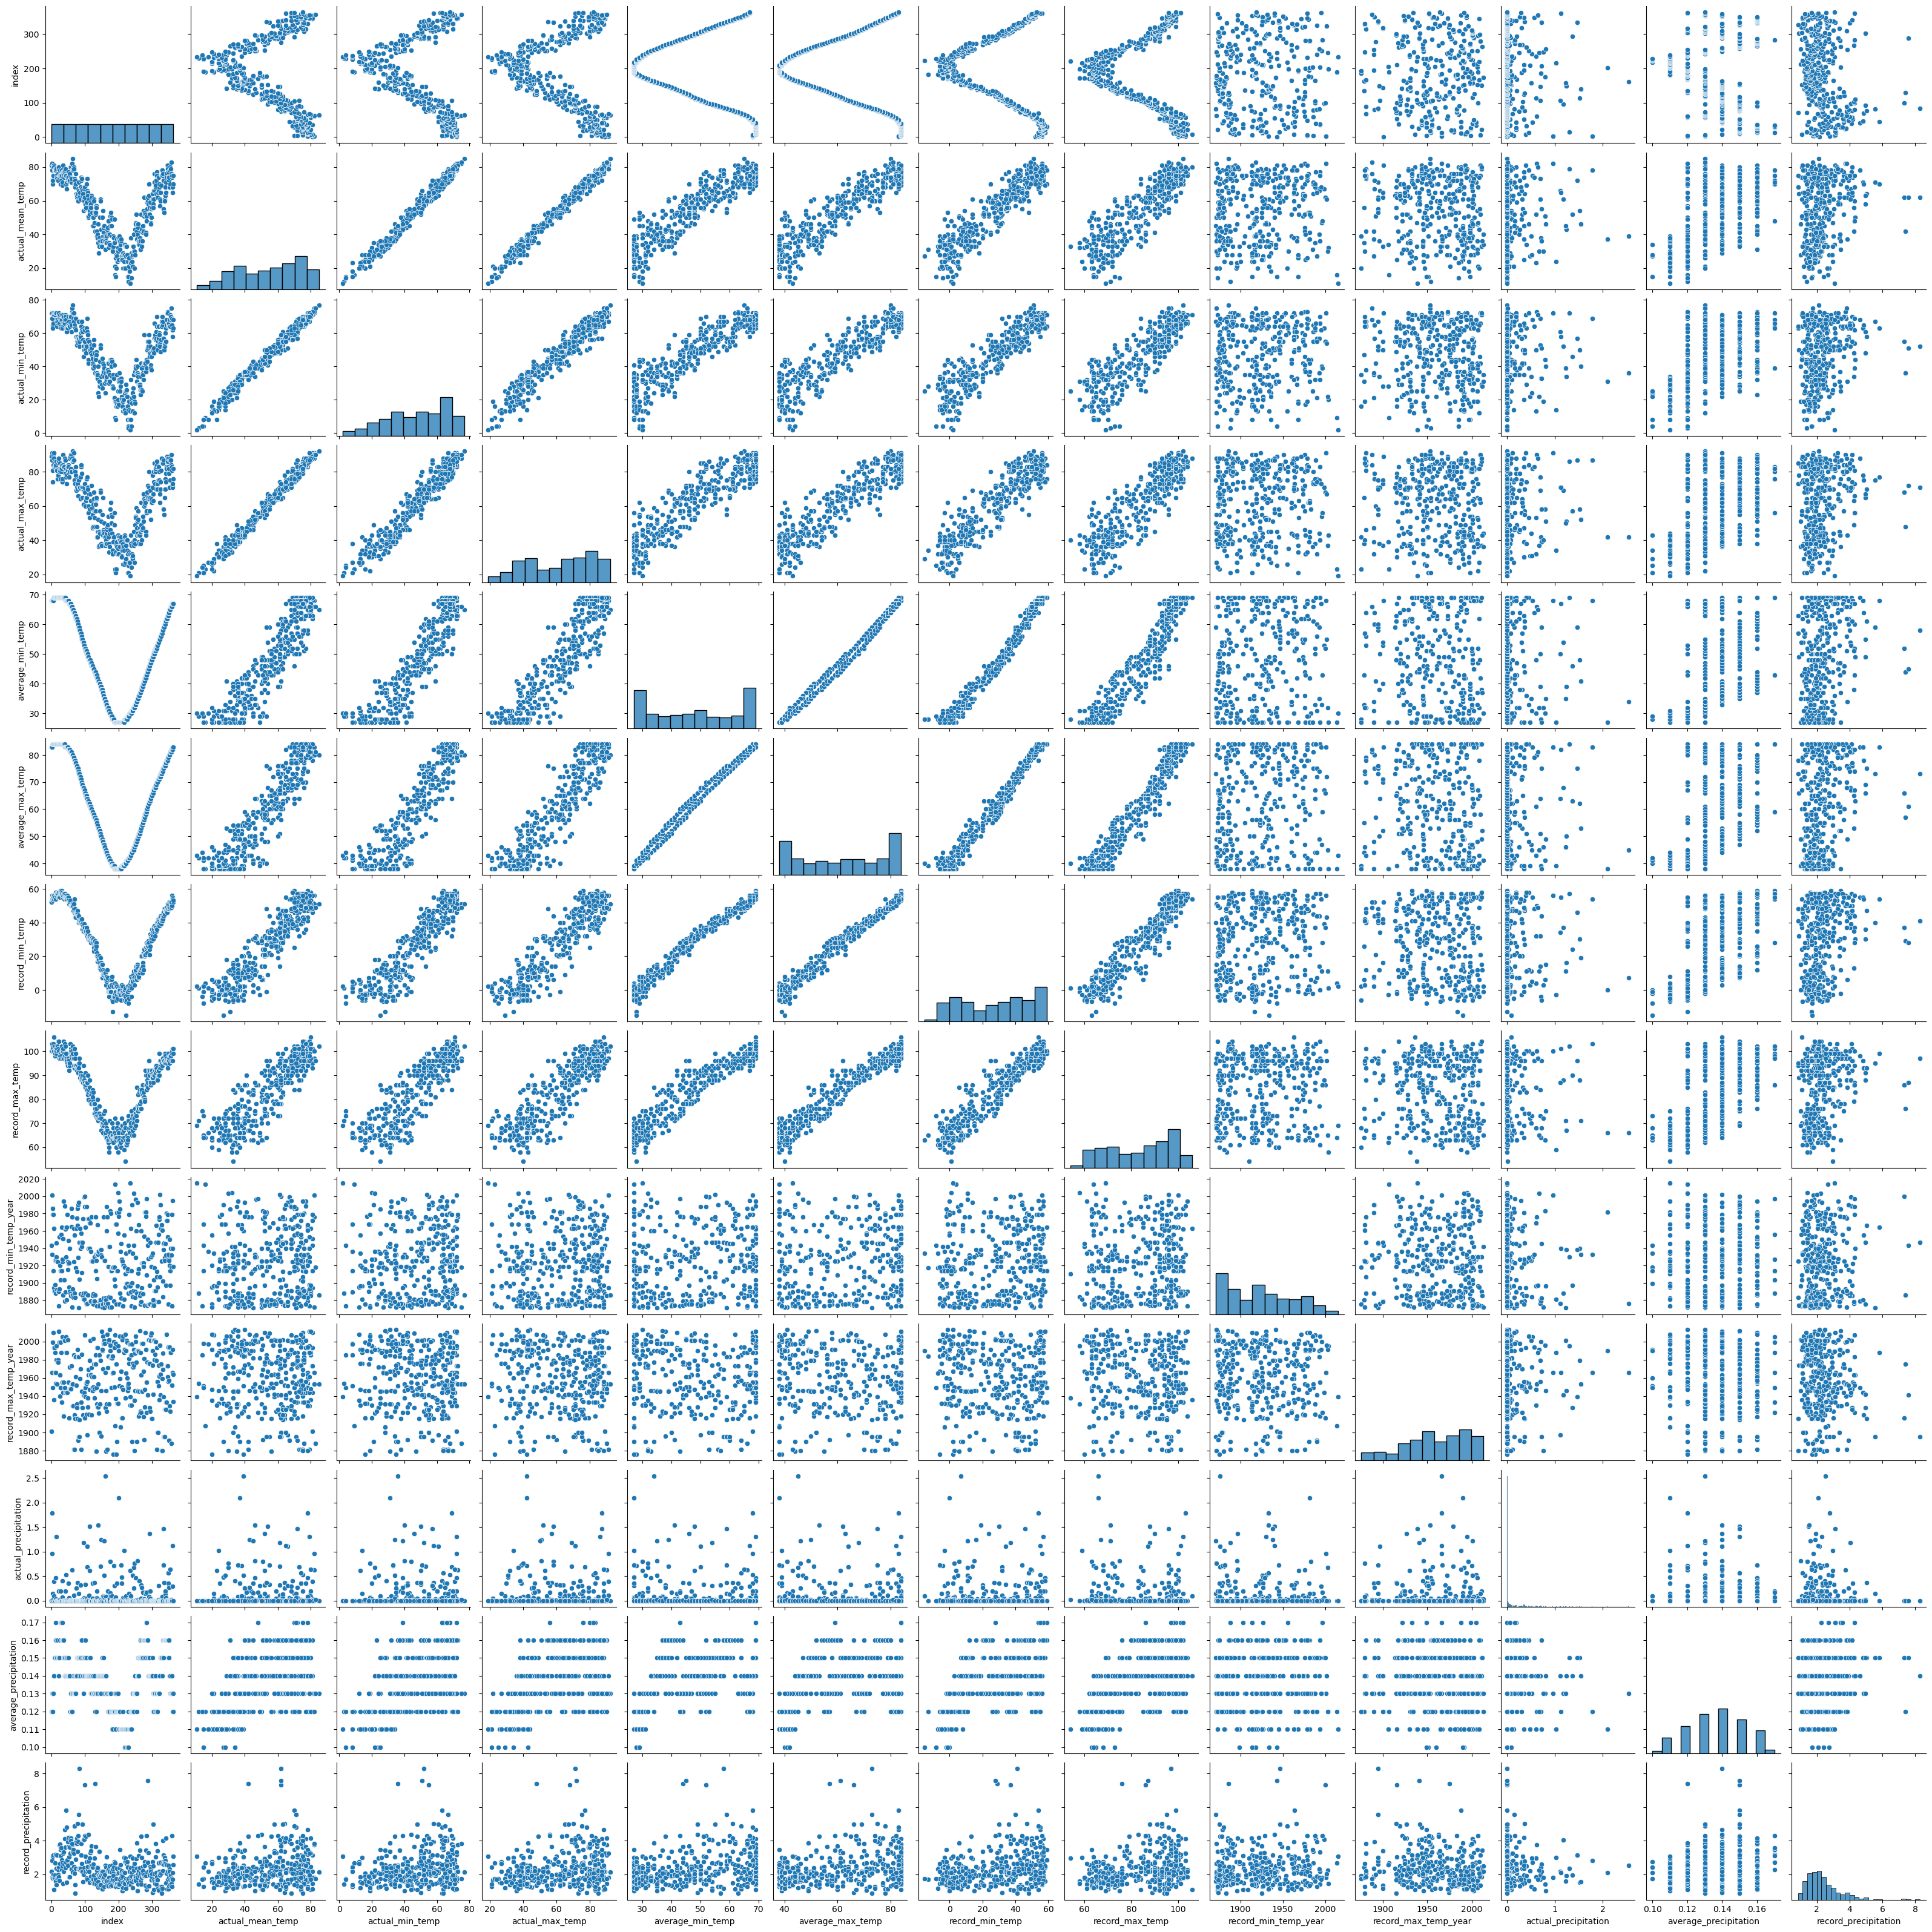

In [60]:
sns.pairplot(data=df)

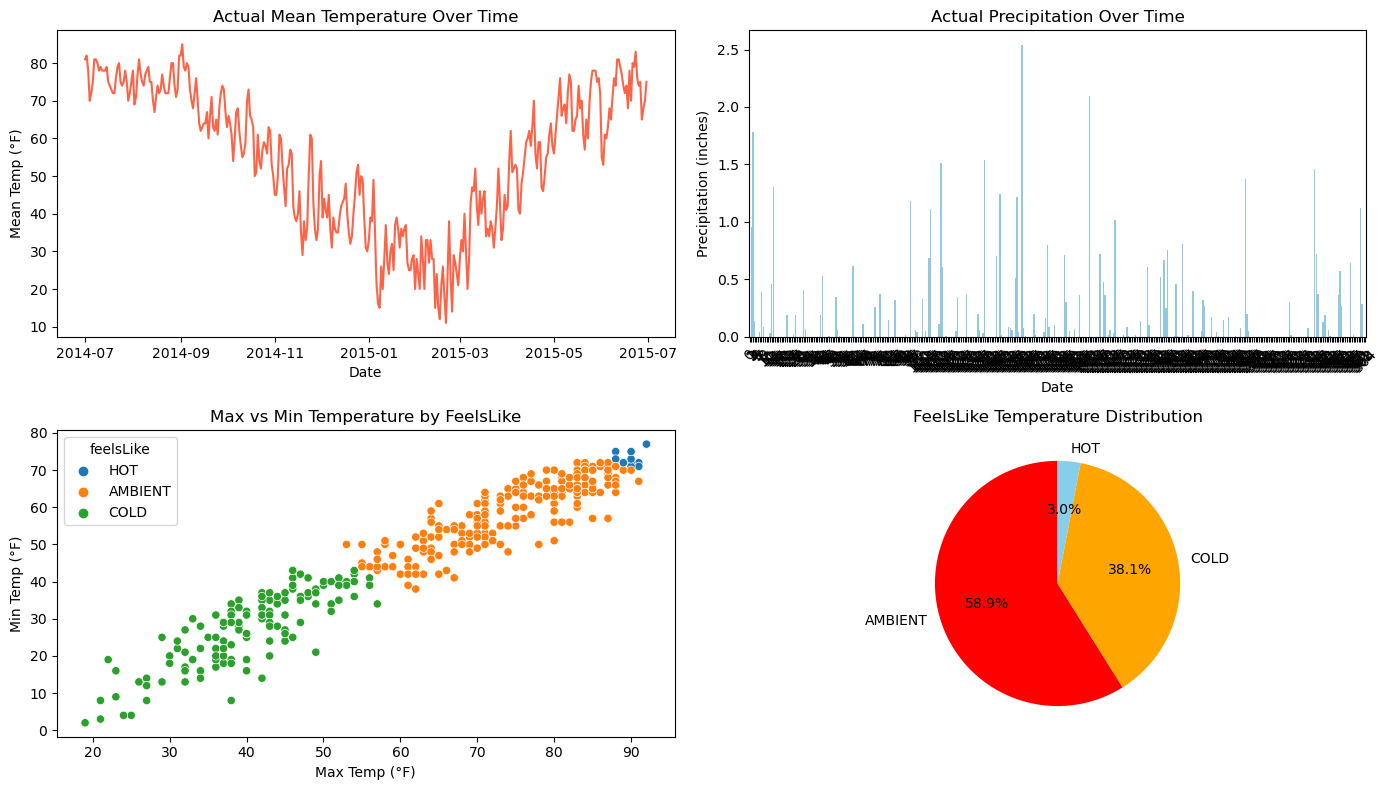

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.lineplot(data=df, x='date', y='actual_mean_temp', ax=axes[0, 0], color='tomato')
axes[0, 0].set_title('Actual Mean Temperature Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mean Temp (°F)')

sns.barplot(data=df, x='index', y='actual_precipitation', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Actual Precipitation Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Precipitation (inches)')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df, x='actual_max_temp', y='actual_min_temp', hue='feelsLike', ax=axes[1, 0])
axes[1, 0].set_title('Max vs Min Temperature by FeelsLike')
axes[1, 0].set_xlabel('Max Temp (°F)')
axes[1, 0].set_ylabel('Min Temp (°F)')

feels_counts = df['feelsLike'].value_counts()
axes[1, 1].pie(feels_counts, labels=feels_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'skyblue', 'green'])
axes[1, 1].set_title('FeelsLike Temperature Distribution')

plt.tight_layout()
plt.show()


In [77]:
df['record_max_temp_year'] = pd.to_numeric(df['record_max_temp_year'], errors='coerce')
df['record_max_temp'] = pd.to_numeric(df['record_max_temp'], errors='coerce')
df['record_min_temp_year'] = pd.to_numeric(df['record_min_temp_year'], errors='coerce')
df['record_min_temp'] = pd.to_numeric(df['record_min_temp'], errors='coerce')



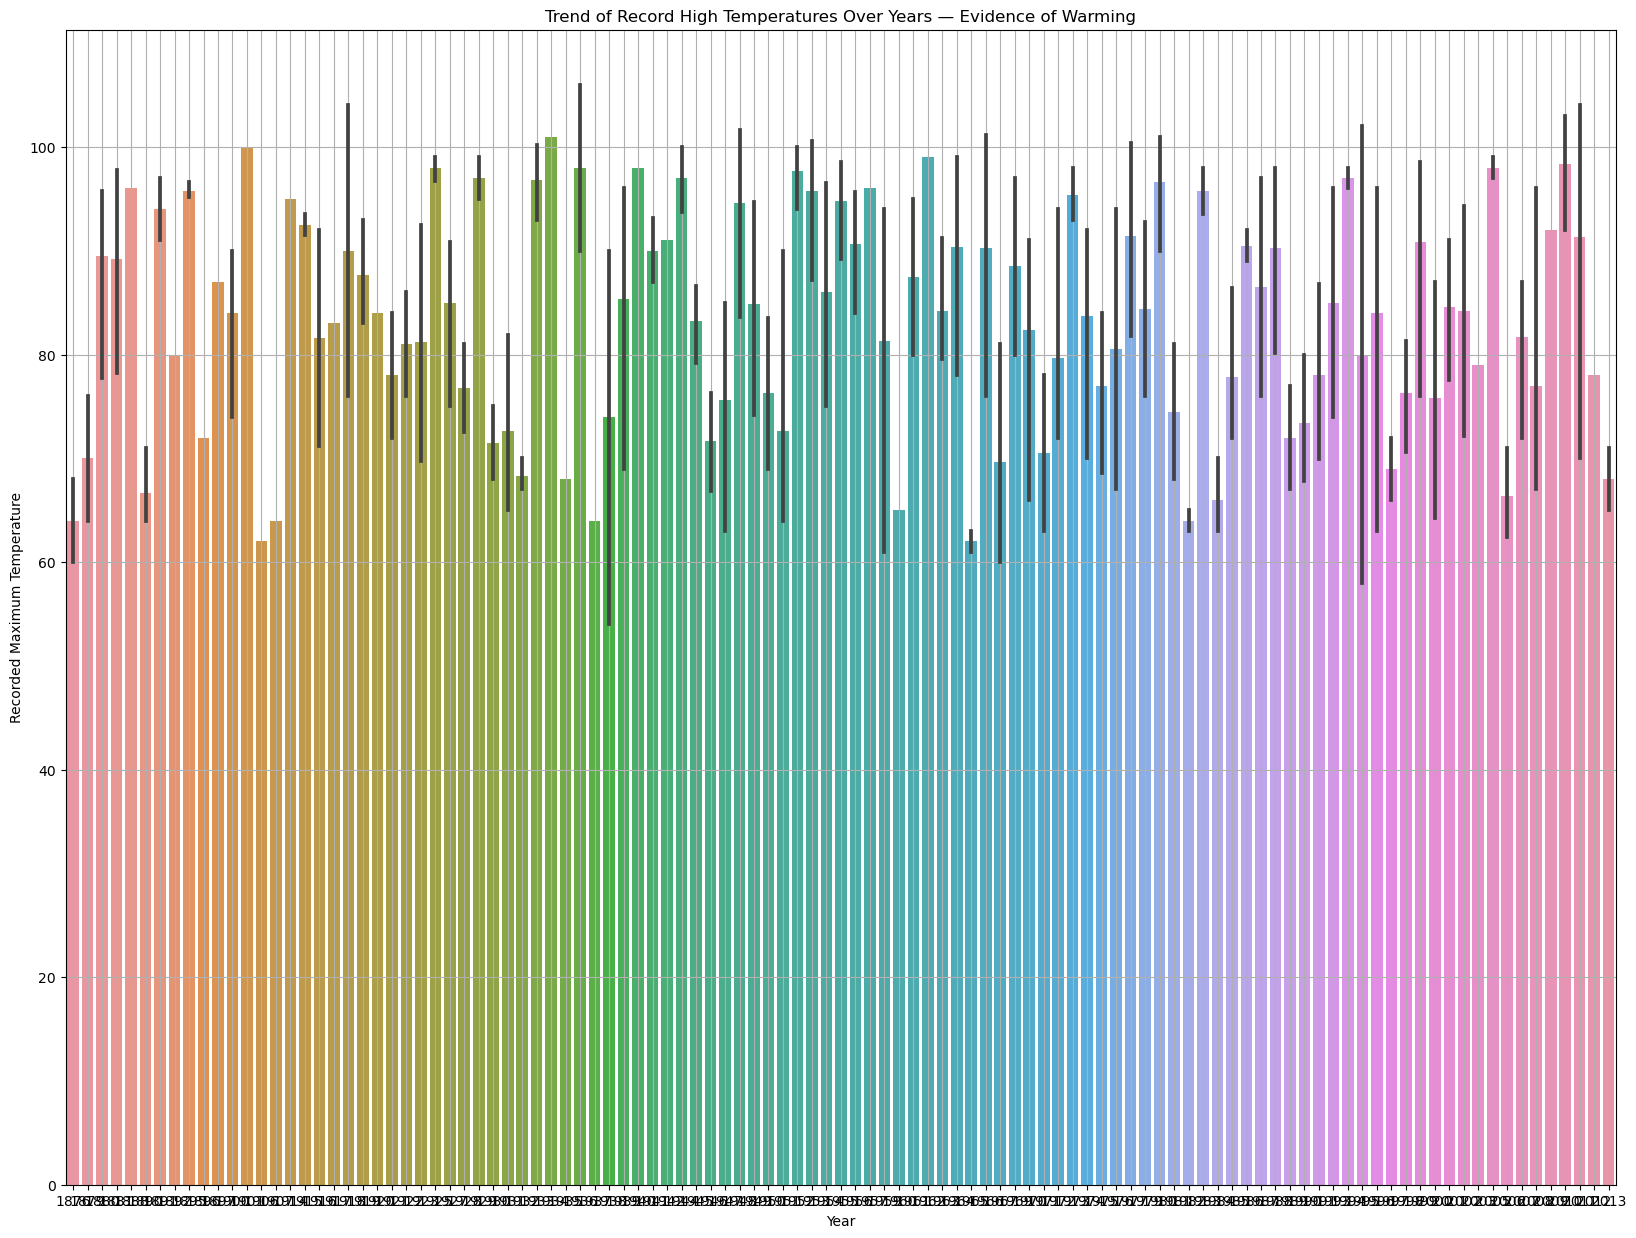

In [78]:
plt.figure(figsize=(20,15))
sns.barplot(data=df, x=df['record_max_temp_year'], y=df['record_max_temp'])
plt.title("Trend of Record High Temperatures Over Years — Evidence of Warming")
plt.xlabel("Year")
plt.ylabel("Recorded Maximum Temperature")
plt.grid(True)
plt.show()

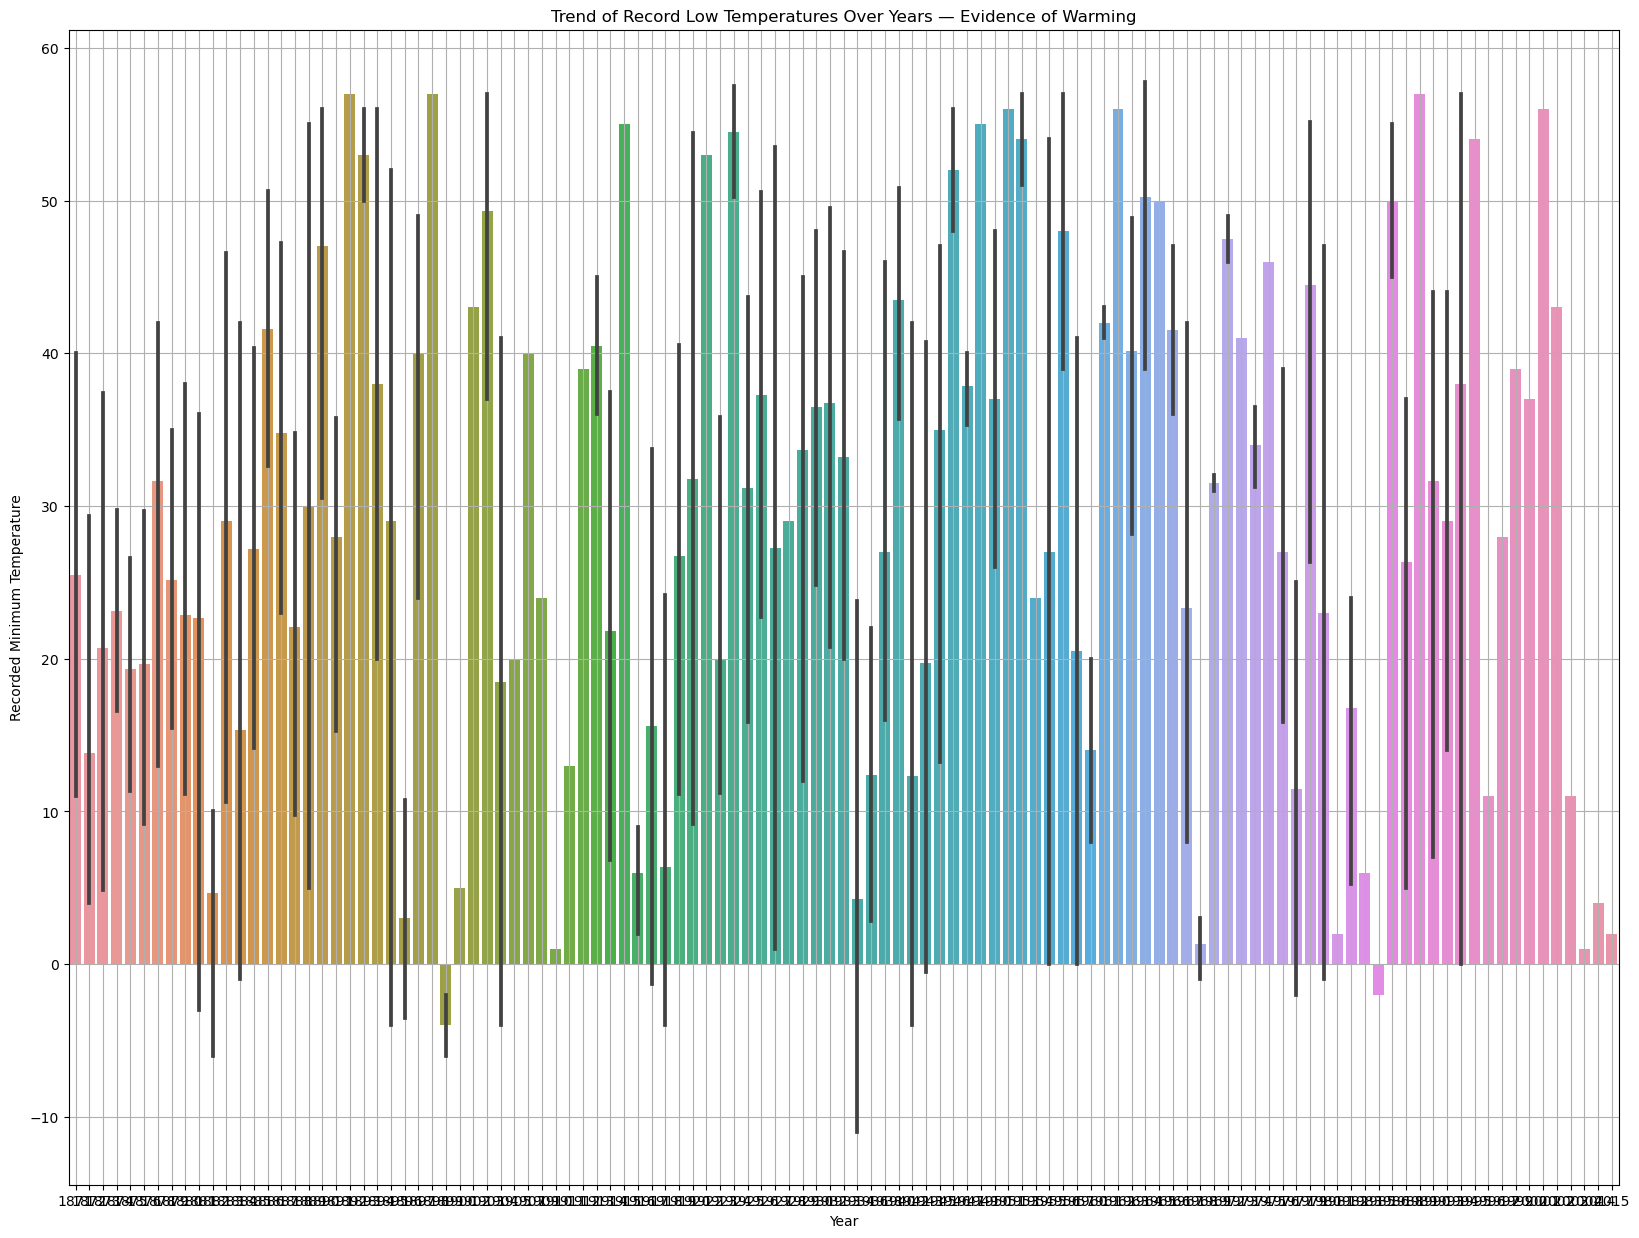

In [80]:
plt.figure(figsize=(20,15))
sns.barplot(data=df, x=df['record_min_temp_year'], y=df['record_min_temp'])
plt.title("Trend of Record Low Temperatures Over Years — Evidence of Warming")
plt.xlabel("Year")
plt.ylabel("Recorded Minimum Temperature")
plt.grid(True)
plt.show()

1. Most days fall under Ambient and Cold categories
2. Precipitation has irregular spikes, so no steady rain pattern in NYC over the period data was collected
3. Temperature falls during Nov - Mar and peaks during June - Sept
4. Scatter plots tells strong positive correlation between minimum and maximum temperatures.
5. Data recorded for max and min temperature shows max temperatures are on uprise and min temperatures are on decline post 1950